## Simulação multiclasses
* Extensão do conceito/função introduzida na aula sobre "Teo. da Decisão de Bayes"
* Aproveite e dê mais uma vez atenção aos parâmetros da distribuição gaussiana multivariada
   * Vetores de médias
   * Matrizes de covariância
* Armazene as versões de treino/avaliação segundo os parâmetros sugeridos
* Posteriormente...
   * Faça novos experimentos alterando estes parâmetros
   * Visualize o arranjo dos dados (no espaço bidimensional)
   * Atenção, a matriz de covariância deve ser simétrica e com determinante não nulo
   
---

#### A função "plt.scatter" gera um diagrama de espalhamento (muito simples) ao passo que cada classe é simulada

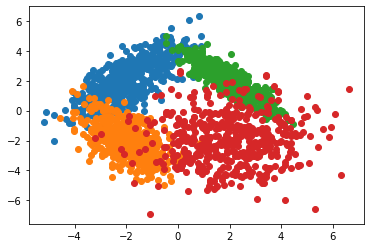

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123456)  #Definição da semente de geração de números aleatórios (caso necessário)

#Caminho do arquivo gerado...
path_out = 'saidaSim_I_SepLin.txt'


#Conjunto D - Treinamento
mu1 = [-2,2]; sigma1 =[ [0.75 , 0.75] , [0.75 , 2.0]]; rotulo1 = 1; qnt1 = 50
mu2 = [-2,-2]; sigma2 = [[0.5 , -0.5] , [-0.5 , 1]]; rotulo2 = 2; qnt2 = 60
mu3 = [2,2]; sigma3 = [[0.5 , -0.5] , [-0.5 , 1]]; rotulo3 = 3; qnt3 = 70
mu4 = [2,-2]; sigma4 = [[2 , 0] , [0 , 2]]; rotulo4 = 4; qnt4 = 80


#Conjunto I - Avaliação
mu1 = [-2,2]; sigma1 =[ [1.0 , 0.85] , [0.85 , 1.5]]; rotulo1 = 1; qnt1 = 500
mu2 = [-2,-2]; sigma2 = [[0.75 , -0.5] , [-0.5 , 1.25]]; rotulo2 = 2; qnt2 = 500
mu3 = [2,2]; sigma3 = [[0.75 , -0.75] , [-0.75 , 1.0]]; rotulo3 = 3; qnt3 = 500
mu4 = [2,-2]; sigma4 = [[2.5 , 0] , [0 , 2.5]]; rotulo4 = 4; qnt4 = 500


rotulos = np.array([rotulo1, rotulo2, rotulo3, rotulo4]) #Indicador das classes
quantidades = np.array([qnt1,qnt2,qnt3,qnt4])    #Número de simulações da classe/rótulo
conjMu = np.array([mu1,mu2,mu3,mu4])           #Vetor médio da classe/rótulo
conjSigma = np.array([sigma1,sigma2,sigma3,sigma4])  #Mat. cov. da classe/rótulo

f= open(path_out,"w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T

    #Descomente a linha abaixo caso queira visualizar os dados simulados!
    plt.scatter(dados[0,:],dados[1,:])
    
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]): #dados.shape = ('dim. espaço','num. simula.')
            st += ','+ str(dados[j,i])
        st += '\n' #depois que forma linha, 'pula para próxima linha'
        f.write(st)

f.close()